# KMeans Clustering

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

#### Creating a dataset for clustering 

In [92]:
from sklearn.datasets import make_blobs

In [93]:
X1,labels_truth = make_blobs(n_samples=5000,centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

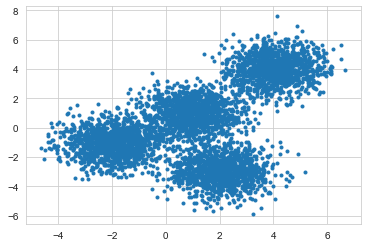

In [94]:
plt.scatter(X1[:,0],X1[:,1],marker='.')

#### For Kmeans clustering. It is very important to find K values that is number of clusters by using elbow method. 

#### After finding K value we will fit the data. After that we can vizualize the cluster. We can check the accuracy by silhoutte score and Jaccard coefficient 

In [95]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X1)

Finding K value by elbow method 

In [96]:
from sklearn.cluster import KMeans

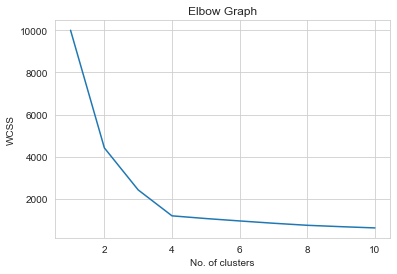

In [99]:
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i,init='k-means++')
    km.fit(X)
    wcss.append(km.inertia_)
    
## Plotting elbow graph
sns.set_style(style='whitegrid')
plt.plot(range(1,11),wcss)
plt.title('Elbow Graph')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.show()

Frow elbow graph we conclude that 4 clusters are required

Training the Kmeans with four cluster 

In [100]:
km = KMeans(n_clusters=4,init='k-means++')
km.fit(X)
y_labels = km.predict(X)
y_labels

array([2, 1, 2, ..., 2, 1, 0])

In [101]:
X[y_labels==0,1].shape

(1258,)

Plotting the clusters formed 

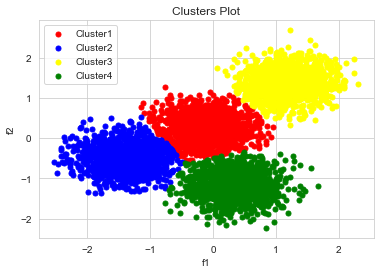

In [102]:
plt.scatter(X[y_labels==0,0],X[y_labels==0,1],s=100,c='red',label='Cluster1',marker='.')
plt.scatter(X[y_labels==1,0],X[y_labels==1,1],s=100,c='blue',label='Cluster2',marker='.')
plt.scatter(X[y_labels==2,0],X[y_labels==2,1],s=100,c='yellow',label='Cluster3',marker='.')
plt.scatter(X[y_labels==3,0],X[y_labels==3,1],s=100,c='green',label='Cluster4',marker='.')
plt.title('Clusters Plot')
plt.xlabel('f1')
plt.ylabel('f2')
plt.legend()
plt.show()

Finding the accuracy of our clusters by <b> Silhoutte coefficient </b> and <b> Jaccard coefficient </b>

In [103]:
# Silhoutte coefficient

In [104]:
from sklearn import metrics

In [105]:
metrics.silhouette_score(X,y_labels)

0.5797487051786709

In [106]:
# Jaccard Coefficient

In [107]:
#### Research more about jaccard coefficient

In [108]:
metrics.jaccard_score(labels_truth,y_labels,average='micro')

0.14377216058561135

#### Here we conclude our KMeans clustering

# Hierarchical Mean Clustering

Creating Dataset for clustering

In [50]:
from sklearn.datasets import make_blobs

In [69]:
X,labels_truth = make_blobs(n_samples=50, centers=[[4,4], [-2, -1], [1, 1], [10,4]], cluster_std=0.9)

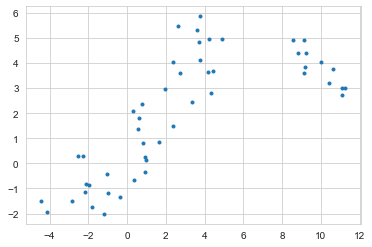

In [70]:
plt.scatter(X[:,0],X[:,1],marker='.')

#### For Hirerachical clustering we don't need to give value of K to form clusters 

#### We can find clusters with the help of dendograms 

To find dendogram we have to find the distance matrix with the help of scipy library then we have to implement linkage function to form agglometric clustering then we can find dendogram

#### Forming clusters using Scipy libary

In [71]:
# importing cdist and finding distance matrix
from scipy.spatial.distance import cdist

In [72]:
distance_matrix = cdist(X,X)

In [73]:
distance_matrix

array([[ 0.        , 14.54352896,  2.41169661, ..., 15.81562295,
        15.43461177, 14.93797628],
       [14.54352896,  0.        , 12.13717958, ...,  1.41499547,
         1.35290572,  1.08887756],
       [ 2.41169661, 12.13717958,  0.        , ..., 13.41862079,
        13.04656814, 12.52637251],
       ...,
       [15.81562295,  1.41499547, 13.41862079, ...,  0.        ,
         0.56956836,  1.90057513],
       [15.43461177,  1.35290572, 13.04656814, ...,  0.56956836,
         0.        ,  2.13462611],
       [14.93797628,  1.08887756, 12.52637251, ...,  1.90057513,
         2.13462611,  0.        ]])

In [74]:
distance_matrix.shape

(50, 50)

In [75]:
## Using linkage to form clusters Here we are using scipy libary to form clusters
from scipy.cluster.hierarchy import *

In [76]:
lm = linkage(X, method='single', metric='euclidean')

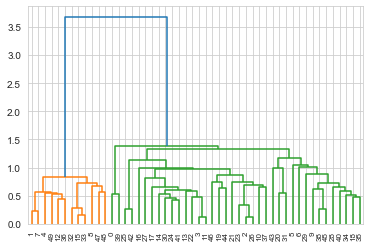

In [77]:
_ = dendrogram(lm)

from dendogram we can consider it has 2 clusters 

#### Forming clusters using sklearn library

In [79]:
from sklearn.cluster import AgglomerativeClustering

In [80]:
ac = AgglomerativeClustering(n_clusters=2)

In [81]:
y_labels = ac.fit_predict(X)

Finding the accuracy of our clusters by <b> Silhoutte coefficient </b> and <b> Jaccard coefficient </b>

In [85]:
#Silhoutte coefficient

In [82]:
metrics.silhouette_score(X,y_labels)

0.5590059607244674

In [86]:
# Jaccard score

In [84]:
metrics.jaccard_score(labels_truth,y_labels,average='micro')

0.35135135135135137

In [87]:
#### This conclude Hierarchical Clustering

# DBSCAN

#### Create data for DBSCAN

In [201]:
from sklearn.datasets import make_blobs

In [202]:
X,labels_truth = make_blobs(n_samples=1500, centers=[[4,4], [-2, -1], [1, 1], [10,4]], cluster_std=0.5)

#### For DBSCAN clustering we need two parameter that is epsilon and min data points 
 
#### For finding epsilon value we can plot 

For finding epsilon value we will calculate shortest distance of nearest neighbour for each data point. It is done by using Nearest neighbout algorithm of sklearn. Then after getting the output we have to short it and then plot it. where there is steep change in slope that will be optimal epsilon value

In [203]:
from sklearn.neighbors import NearestNeighbors

In [204]:
neigh = NearestNeighbors(n_neighbors=2) 
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

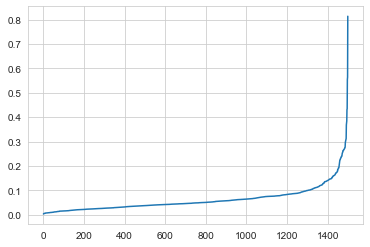

In [205]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

From K-distance plot we can conclude that optimal epsilon is 0.2 for this data

#### Model Creation

In [206]:
from sklearn.cluster import DBSCAN

In [207]:
db = DBSCAN(eps=0.2,min_samples=5)

In [208]:
y_labels = db.fit_predict(X)

In [209]:
tot_labels = db.labels_

In [210]:
## To find number of clusters 
n_cluster = len(set(tot_labels)) - (1 if -1 in set(tot_labels) else 0) ## Removing the noise cluster if it is present
n_cluster

6

In [211]:
## Find the names of the clusters 
cluster_names = set(tot_labels)
cluster_names

{-1, 0, 1, 2, 3, 4, 5}

In [212]:
tot_noise_point = list(tot_labels).count(-1)
tot_noise_point

108

In [213]:
## Checking the homogenity score

In [214]:
print('Estimated number of clusters: %d' % n_cluster)
print('Estimated number of noise points: %d' % tot_noise_point)

"""Homogeneity metric of a cluster labeling given a ground truth.

A clustering result satisfies homogeneity if all of its clusters
contain only data points which are members of a single class."""

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_truth, y_labels))

Estimated number of clusters: 6
Estimated number of noise points: 108
Homogeneity: 0.928


#### Plotting DBSCAN Clusters 

In [215]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)  # creating an array of true and false as the same size as db.labels
core_samples_mask[db.core_sample_indices_] = True  # setting the indices of the core regions to True

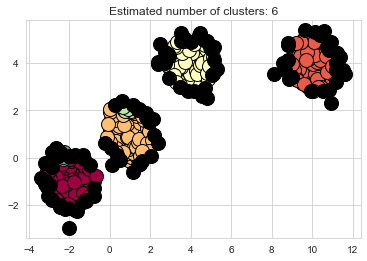

In [216]:
# Black  is used for noise.
unique_labels = set(tot_labels)  # identifying all the unique labels/clusters
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]  # creating the list of colours, generating the colourmap



for k, col in zip(unique_labels, colors):
    
    
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (tot_labels == k)   # assigning class members for each class
    

    xy = X[class_member_mask & core_samples_mask] # creating the list of points for each class
    
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)
    

    xy = X[class_member_mask & ~core_samples_mask] # creating the list of noise points
    
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)
    
    

plt.title('Estimated number of clusters: %d' % n_cluster)
plt.show()

Finding the accuracy of our clusters by <b>Silhoutte coefficient</b> and <b>Jaccard coefficient</b>

In [217]:
metrics.silhouette_score(X,y_labels)

0.44753296681675503

In [219]:
metrics.jaccard_score(labels_truth,y_labels,average='micro')

0.13122171945701358

In [196]:
## This conclude DBSCAN

# PCA

#### Creation of Data

In [198]:
from sklearn.datasets import make_classification

In [220]:
X1,Y = make_classification(n_samples=500,n_features=6,random_state=0)

#### PCA is not a machine learning algorithm. It is used for dimensionality reduction technique

#### In PCA we have to find optimal number of Principal Components by using the Scree plot which is drawn by using the explained variance ratio

In [221]:
## First step of PCA is to standarize the data 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X1)

In [222]:
from sklearn.decomposition import PCA

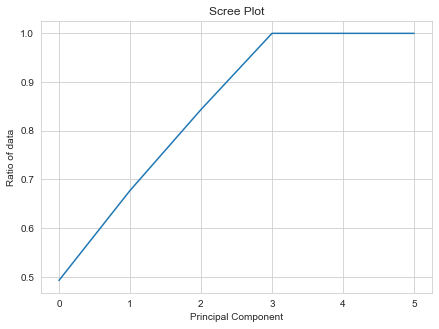

In [223]:
pca = PCA()
pc = pca.fit_transform(X)
plt.figure(figsize=(7,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Ratio of data')
plt.show()

From Scree plot we can get that by using 3 principal components we can get 100% of data so, we have reduced the dimension by 50%

In [224]:
pca = PCA(n_components=3)
pc = pca.fit_transform(X)

In [226]:
data = pd.DataFrame(pc,columns = ['pc1','pc2','pc3'])
data.head()

,pc1,pc2,pc3
0,1.338902,0.316185,-0.671023
1,-1.657615,1.677064,0.499088
2,1.157338,0.754435,1.550334
3,-0.401126,0.519493,0.890517
4,-1.391186,-0.269535,-0.021967


In [227]:
## This conclude PCA